In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 1. Previous Labs

In [5]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [6]:
cols = []
for colname in customer_df.columns:
    cols.append(colname.lower().replace(' ', '_'))
customer_df.columns = cols

customer_df.rename(columns={'employmentstatus':'employment_status'}, inplace = True)

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [8]:
numerical_df = customer_df.select_dtypes(include = np.number)

In [9]:
def discrete_continuous(df):
    
    discrete_df = pd.DataFrame()
    continuous_df = pd.DataFrame()
    
    for column in df.columns:
        if df[column].nunique() <= 100:
            discrete_df[column] = df[column]
        else:
            continuous_df[column] = df[column]
    
    return discrete_df, continuous_df

In [10]:
discrete_df, continuous_df = discrete_continuous(numerical_df)

In [11]:
def plot(df):
    for column in df.columns:
        if df[column].nunique() <= 100:
            plt.figure(figsize=(20, 6))
            sns.countplot(x=df[column], data=df)
            plt.title(f'Count Plot of {column}')
            plt.xticks(rotation=90)  # Rotate x-axis labels vertically
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(x=df[column], bins=20, kde=True)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

In [12]:
continuous_df = continuous_df[(continuous_df['customer_lifetime_value'] <= 65000)] # I have corrected this, in the previous lab, I accidentally removed the outliers of the target.
customer_df = customer_df[(customer_df['customer_lifetime_value'] <= 65000)]
numerical_df = numerical_df[(numerical_df['customer_lifetime_value'] <= 65000)]

In [13]:
numerical_df.to_csv('numerical_230823.csv', index=False)

In [14]:
categorical_df = customer_df.select_dtypes(include = np.object)
categorical_df.drop('customer', axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9960\2569495330.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include = np.object)


In [15]:
substitutions = {
    'Offer1': 'O1',
    'Offer2': 'O2',
    'Offer3': 'O3',
    'Offer4': 'O4'
}

categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].map(substitutions)

In [16]:
substitutions2 = {
    'Employed': 'Active',
    'Unemployed': 'Inactive',
    'Medical Leave': 'Inactive',
    'Disabled': 'Inactive',
    'Retired': 'Inactive'
}

categorical_df['employment_status'] = categorical_df['employment_status'].map(substitutions2)

In [17]:
substitutions3 = {
    'Bachelor': 'Bachelor',
    'College': 'College',
    'High School or Below': 'High School or Below',
    'Master': 'Higher',
    'Doctor': 'Higher'
}

categorical_df['education'] = categorical_df['education'].map(substitutions3)

In [18]:
substitutions4 = {
    'Four-Door Car': 'Four-Door Car',
    'Two-Door Car': 'Two-Door Car',
    'SUV': 'SUV',
    'Sports Car': 'Sports Car',
    'Luxury SUV': 'Luxury',
    'Luxury Car': 'Luxury'
}
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].map(substitutions4)

In [19]:
categorical_df.to_csv('categorical_230821.csv', index=False)

# 2. Plot all the categorical variables with the proper plot. What can you see?

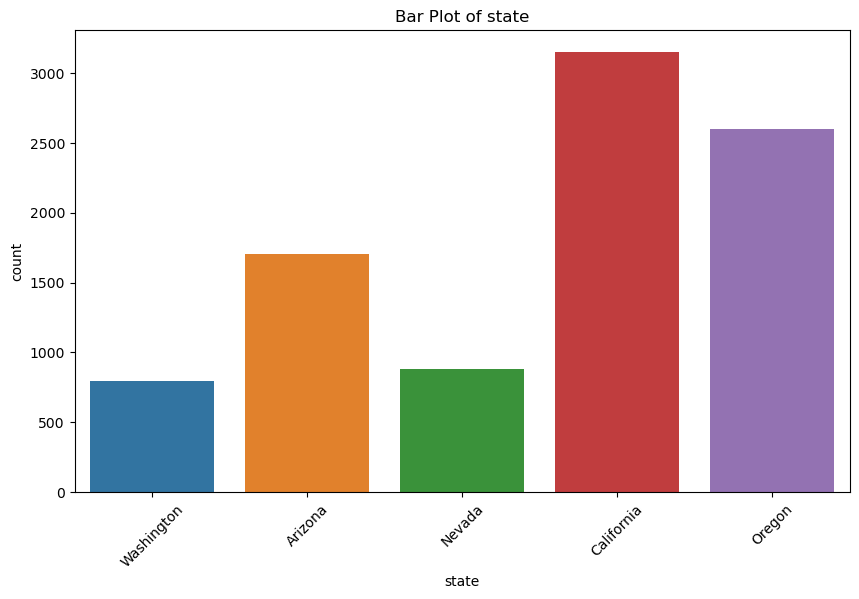

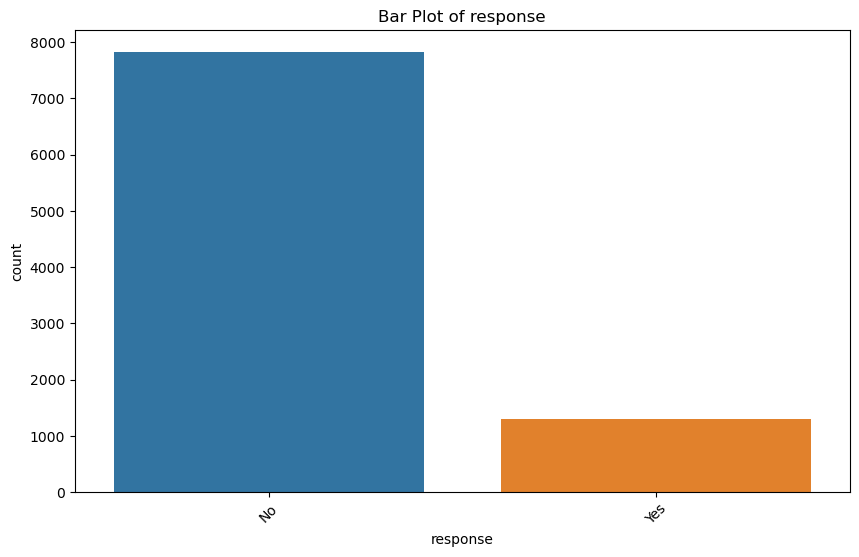

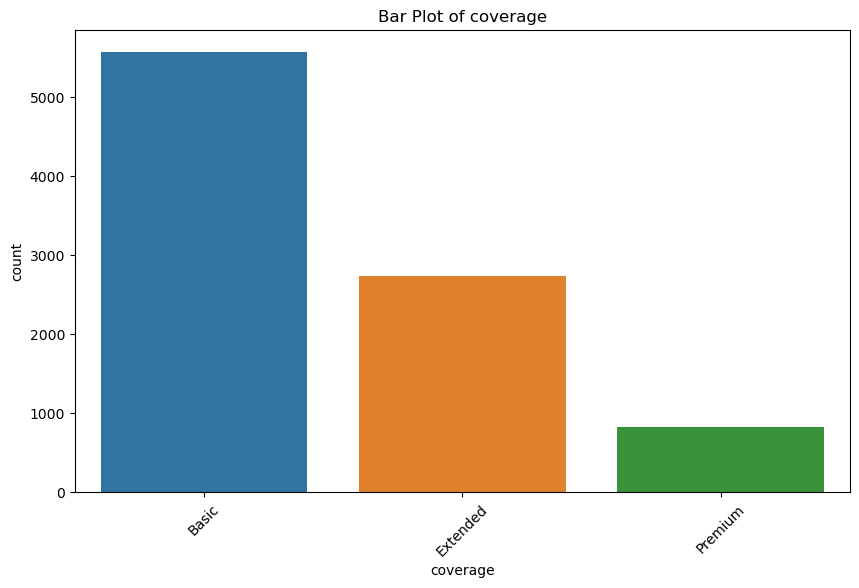

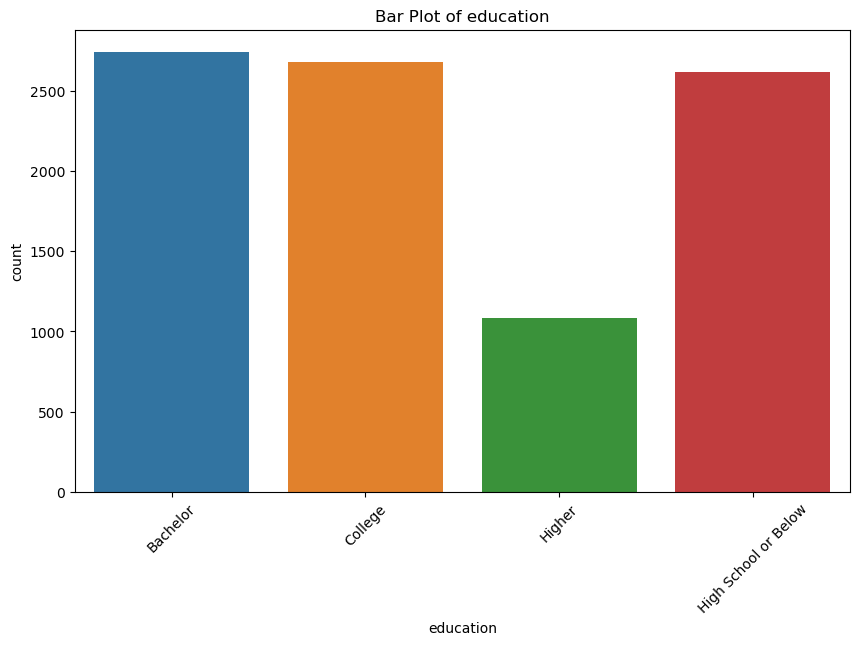

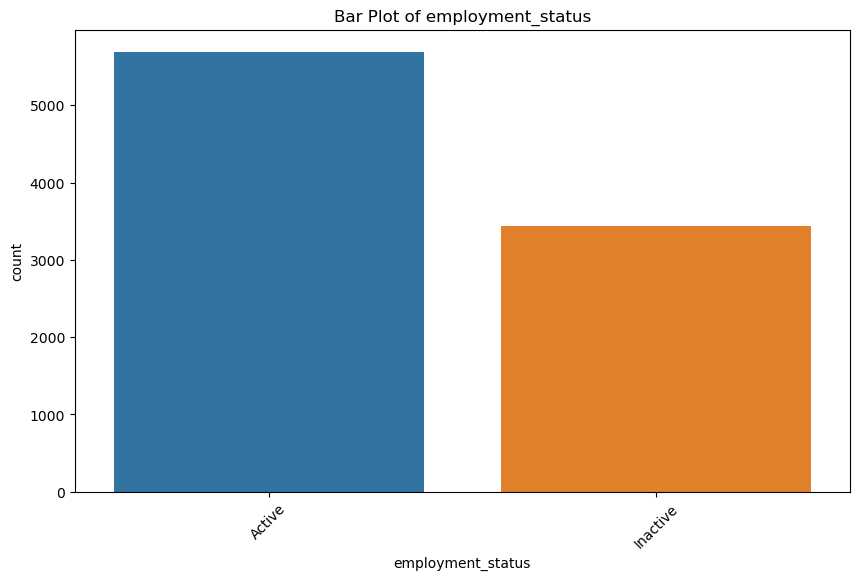

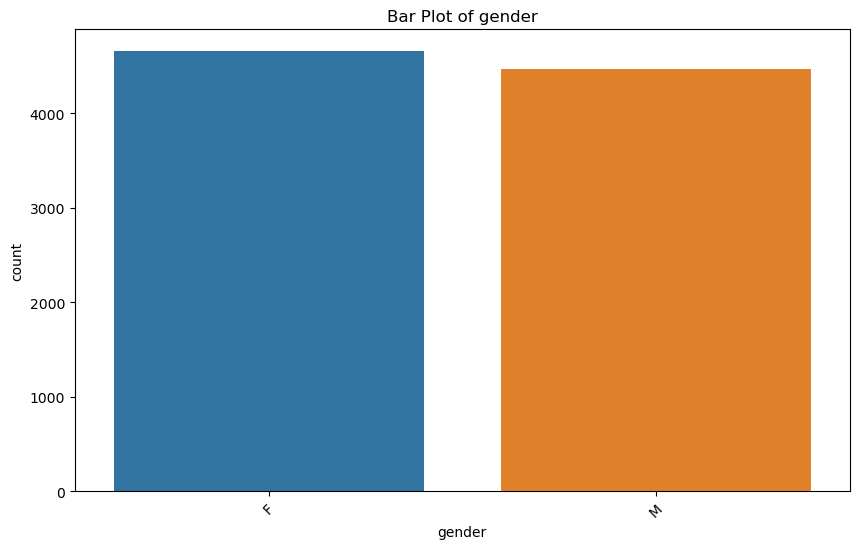

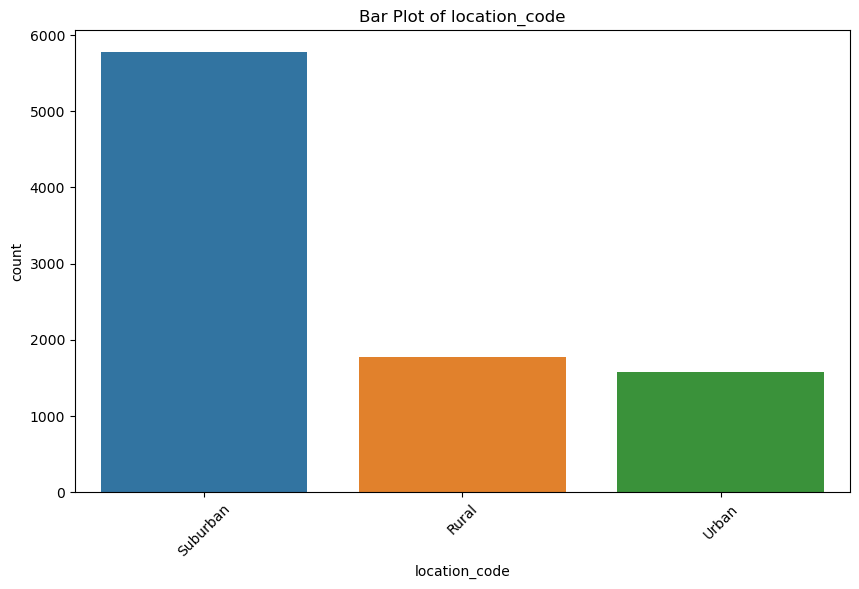

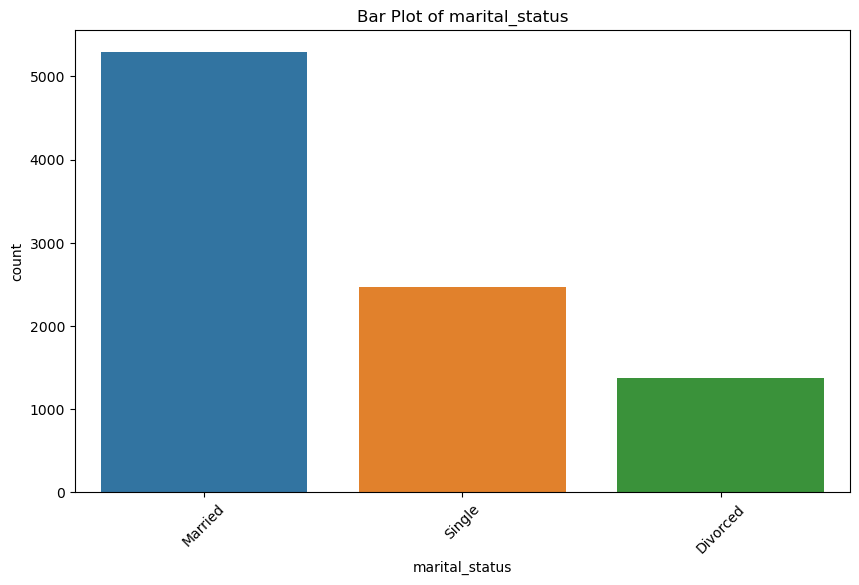

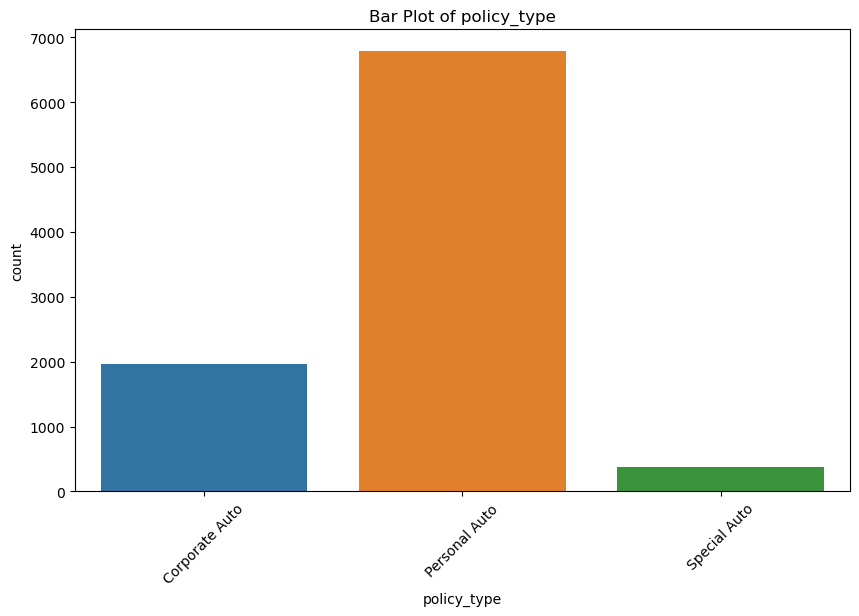

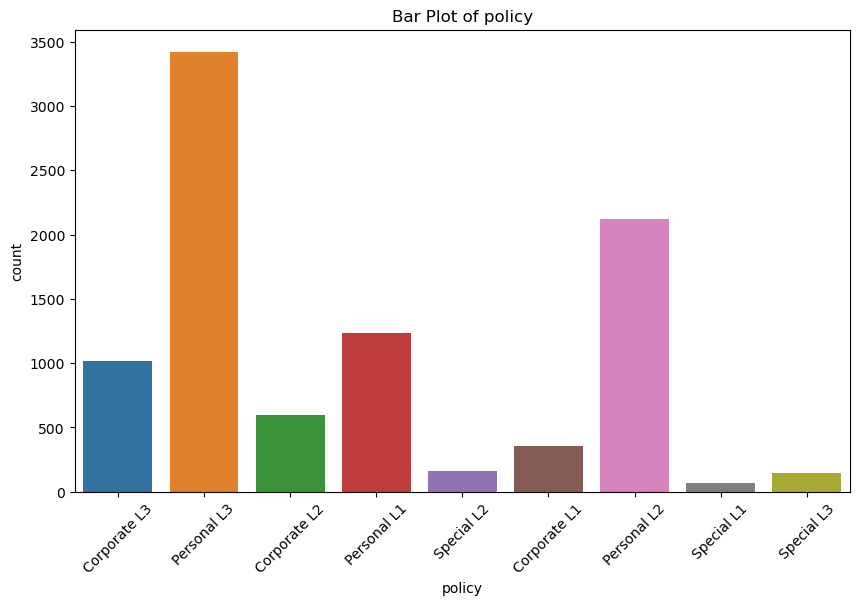

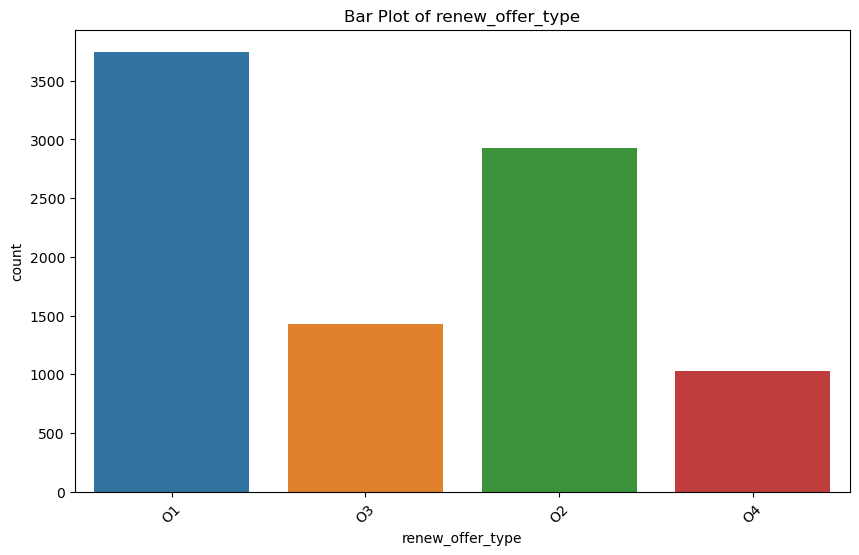

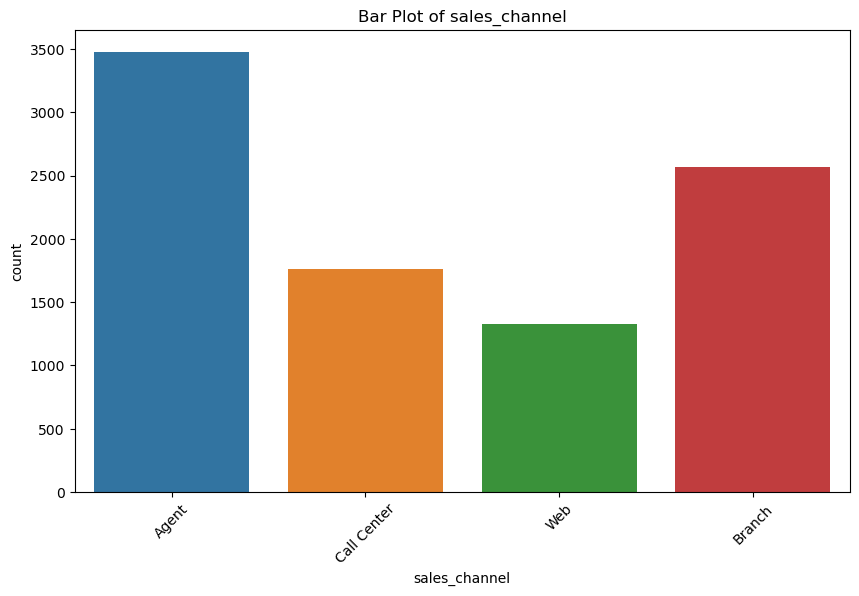

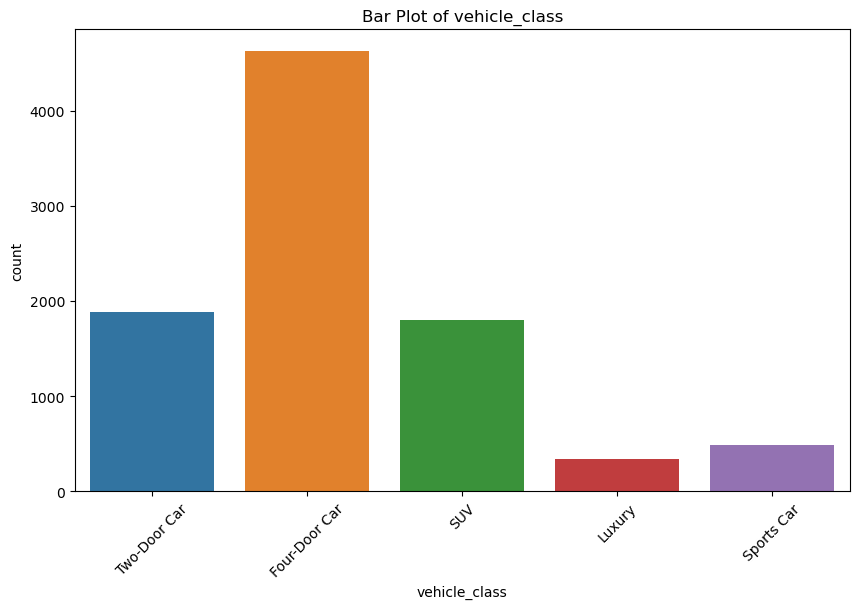

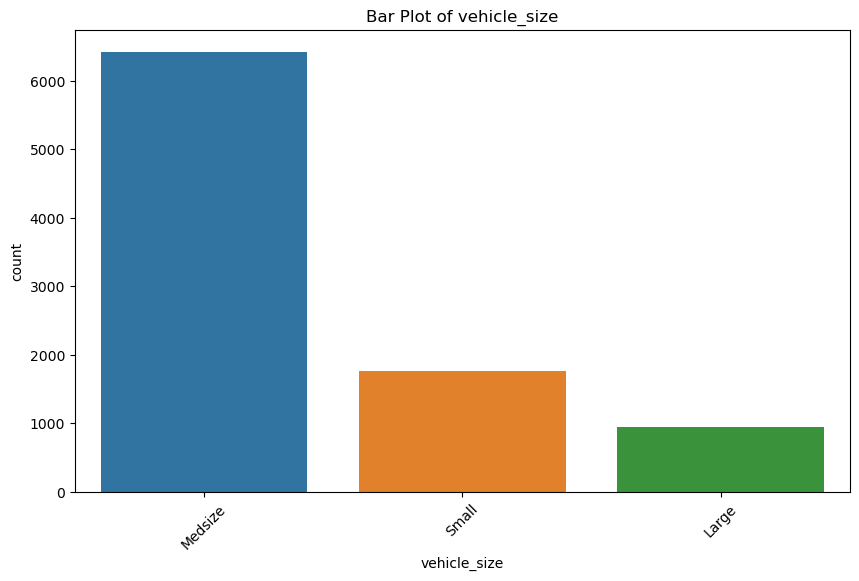

In [20]:
for col in categorical_df.columns:
    plt.figure(figsize = (10, 6))
    sns.countplot(data = categorical_df, x = col)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation = 45)
    plt.show()

The variables don´t follow a normal distribution. Gender doesn´t give much information.

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

I´ll drop gender column.

In [25]:
categorical_df = categorical_df.drop(['gender'], axis = 1)

In [26]:
categorical_df

,state,response,coverage,education,employment_status,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Active,Suburban,Married,Corporate Auto,Corporate L3,O1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Inactive,Suburban,Single,Personal Auto,Personal L3,O3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Active,Suburban,Married,Personal Auto,Personal L3,O1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Inactive,Suburban,Married,Corporate Auto,Corporate L2,O1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Active,Rural,Single,Personal Auto,Personal L1,O1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Active,Urban,Married,Personal Auto,Personal L1,O2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Active,Suburban,Divorced,Corporate Auto,Corporate L3,O1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Inactive,Suburban,Single,Corporate Auto,Corporate L2,O1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Active,Suburban,Married,Personal Auto,Personal L2,O3,Branch,Four-Door Car,Large


# 4. Make any changes you feel are necessary.

# 5. Plot time variable. Can you extract something from it?

# 6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.